# <span style="color:orange">27/05 - Pair Regresión 3- Alicia y Lidia</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('animes1.csv', index_col=0)
df.head()

,title,episodes,members,popularity,ranked,score
0,Haikyuu!! Second Season,25.0,2389,141,25.0,8.82
1,Shigatsu wa Kimi no Uso,22.0,2389,28,24.0,8.83
2,Made in Abyss,13.0,2389,98,23.0,8.83
3,Fullmetal Alchemist: Brotherhood,2.0,2389,4,1.0,6.41
4,Kizumonogatari III: Reiketsu-hen,1.0,2389,502,22.0,8.83



### 1. Toma únicamente las variables de tipo numérico del dataset.
- Realiza un EDA explicando algunas de las cosas interesantes del conjunto de datos.
- Obtene la matriz de correlacion de las variables y estudia los resultados explicando las diferentes correlaciones con las variables.
- Limpia los datos de trabajo en caso de que sea necesario.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
episodes,15875.0,5.618079,7.377761,1.0,1.00,2.00,10.00,28.00
members,15875.0,4269.727118,7016.771672,25.0,295.00,2135.00,3426.00,35661.00
popularity,15875.0,7773.616756,4978.638763,1.0,3118.00,7803.00,12196.50,16320.00
ranked,15875.0,6816.238929,4373.450523,1.0,2856.50,6899.00,10503.50,14675.00
score,15875.0,6.500917,1.011336,3.7,5.81,6.46,7.26,9.11


In [5]:
df.stb.missing()

,missing,total,percent
title,0,15875,0.0
episodes,0,15875,0.0
members,0,15875,0.0
popularity,0,15875,0.0
ranked,0,15875,0.0
score,0,15875,0.0


In [6]:
df.dtypes

title          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
dtype: object

In [7]:
df_numericas = df.select_dtypes(include=np.number)

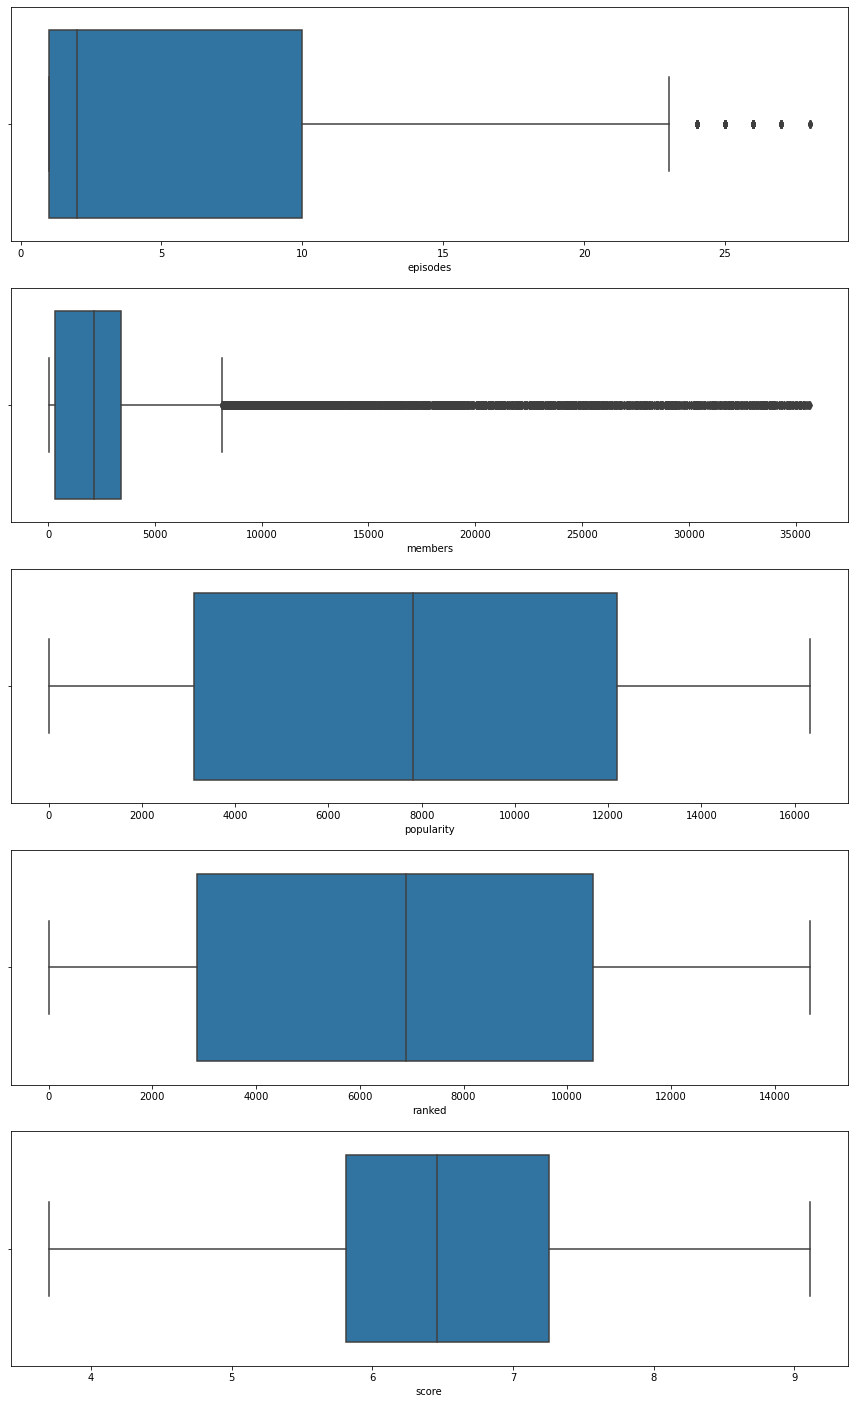

In [8]:
fig, axes = plt.subplots(5, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

**Vemos que solo dos de nuestras columnas numéricas tienen outliers, pero como la naturaleza de nuestros datos son número de suscriptores y valoración... tiene sentido que varíen en valores por lo que los mantendremos.**

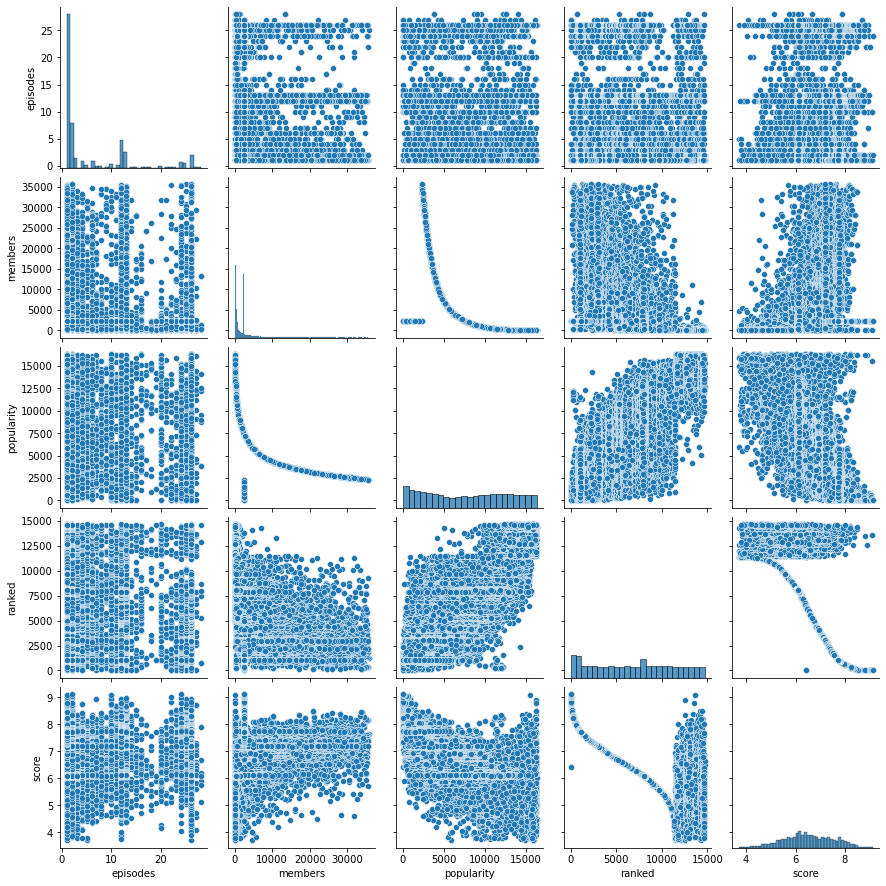

In [9]:
sns.pairplot(df_numericas)

In [10]:
df_numericas.corr()

,episodes,members,popularity,ranked,score
episodes,1.000000,0.083356,-0.317696,-0.238946,0.250869
members,0.083356,1.000000,-0.484382,-0.400797,0.323484
popularity,-0.317696,-0.484382,1.000000,0.854343,-0.717867
ranked,-0.238946,-0.400797,0.854343,1.000000,-0.841459
score,0.250869,0.323484,-0.717867,-0.841459,1.000000


**Vemos que en el DF todas las variables tienen alguna relación, porque ninguna es = 0. En general no tienen mucha relación porque se acercan a 0(por ejemplo: 'episodes' y 'members')**

**Hay otras como por ejemplo 'ranked' y 'score'que tienen una fuerte relación inversa**

<AxesSubplot:>

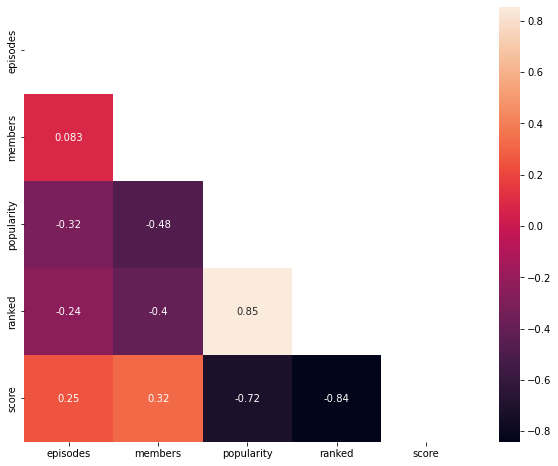

In [11]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df_numericas.corr() 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

**Con este mapa de calor reforzamos lo explicado anteriormente sobre las relaciones.**

- Realiza el ajuste lineal múltiple mostrando las métricas.


In [12]:
df_numericas.head()

,episodes,members,popularity,ranked,score
0,25.0,2389,141,25.0,8.82
1,22.0,2389,28,24.0,8.83
2,13.0,2389,98,23.0,8.83
3,2.0,2389,4,1.0,6.41
4,1.0,2389,502,22.0,8.83


In [13]:
x =df_numericas.drop(columns = ['score']) #Quitamos nuestra variable dependiente.
y = df_numericas['score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresión lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.710493758593725
El valor de r2 score adjusted es  0.7104025396125808
El MAE es 0.35754631220571986
EL RMSE es  0.5451423198499081
Para el conjunto test:---------------
El valor de r2 score es  0.7128251216482115
El valor de r2 score adjusted es  0.7124627558711115
El MAE es 0.35046761446076585
EL RMSE es  0.537920096206576


**Observamos que al hacer la regresión lineal multiple con solo nuestras variables numéricas con una como variable dependiente y las demás independiente, el r2 ha mejorado bastante respecto a la regresión lineal simple. Y las demás métricas siguen siendo valores bajos.**

### 2. Toma ahora el dataset incluyendo las variables categóricas.
- Realiza el EDA de las variables categóricas que se va a incluir en el modelo.
- Utiliza algun tipo de codificación para las variables numéricas.
- Realiza la misma limpieza de datos, en caso necesario, aplicada en el dataset del apartado para dejar las variables numéricas limpias.
- Obten el ajuste lineal múltiple incluyendo las variables categóricas


In [14]:
df.dtypes

title          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
dtype: object

In [15]:
df.stb.missing()

,missing,total,percent
title,0,15875,0.0
episodes,0,15875,0.0
members,0,15875,0.0
popularity,0,15875,0.0
ranked,0,15875,0.0
score,0,15875,0.0


**Pasamos a codificar la variable categórica con el método LabelEncoding asignandole un número a cada valor único.**

In [16]:
label_encoded_df = df.copy()

# iniciamos el método
le = LabelEncoder()

# lo aplicamos a todo nuestro dataframe 
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])

In [17]:
label_encoded_df

,title,episodes,members,popularity,ranked,score
0,4175,25.0,2389,141,25.0,8.82
1,11065,22.0,2389,28,24.0,8.83
2,7324,13.0,2389,98,23.0,8.83
3,3331,2.0,2389,4,1.0,6.41
4,6414,1.0,2389,502,22.0,8.83
...,...,...,...,...,...,...
19306,3232,13.0,2389,843,1070.0,7.73
19307,3363,2.0,2389,1292,1071.0,7.73
19308,3486,19.0,2389,1314,1073.0,7.73
19309,5264,1.0,2389,1469,1077.0,7.73


In [18]:
x=label_encoded_df.drop(columns = ['score'])
y = label_encoded_df['score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresiónn lineal
LR = LinearRegression() 
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.7148612182371572
El valor de r2 score adjusted es  0.7147489058132708
El MAE es 0.35730737631651216
EL RMSE es  0.5410147146935439
Para el conjunto test:---------------
El valor de r2 score es  0.7180710292673285
El valor de r2 score adjusted es  0.7176262060254025
El MAE es 0.3491967702532211
EL RMSE es  0.5329842793318814


**Después de introducir nuestra variable categórica en la regresión lineal, vemos que afecta al resultado de manera positiva, ya que aumenta aunque ligeramente el r2.**

In [19]:
label_encoded_df.to_csv('anime_codi.csv')